# Part 3 - Predictive Modelling + Executive Summary

## Introduction

This notebook contains the following predictive models as part of Project Four requirements:

__Section 1:__ Predicting Job Salary based on all scraped data from seek.com.au<br>
__Section 2:__ Predicting Senior and Non-Senior roles from detailed Job Description text<br>
__Executive Summary:__ Summary on the predictions, key findings and risk and limitations

In [222]:
# Import libraries

import pandas as pd
import numpy as np

## Section 1:  Predict Job Salary based on all available features

In [223]:
# Load the jobs_df.csv generated after scraping, extracting, cleaning and transforming data from Part 1 and Part 2 notebooks

jobs_df_csv = '../project-four/jobs_df.csv'
jobs_df = pd.read_csv(jobs_df_csv, encoding='iso-8859-1', index_col ='job_ids')

In [224]:
# Inspect the shape
jobs_df.shape

(1059, 7)

In [225]:
# Inspect the columns
jobs_df.columns

Index(['job_desc', 'salary', 'advertiser', 'title', 'class', 'sub_class',
       'type'],
      dtype='object')

In [226]:
# Clean jobs_desc column 

jobs_df.job_desc = jobs_df.job_desc.str.replace('[0-9]','') # removes digits
jobs_df.job_desc = jobs_df.job_desc.str.replace('/_/','') # removes words that starts with underscore _

In [227]:
# Create new DataFrame and dummify required categorical variables (except for job_desc and salary)
jobs_dummy = pd.get_dummies(jobs_df, columns = ['advertiser', 'class','sub_class', 'title','type'], drop_first = True)

In [228]:
# Inspect the dummified columns
jobs_dummy.head(1)

,job_desc,salary,advertiser_A.G. Coombs,advertiser_AGL,advertiser_AIA Insurance,advertiser_AIG,advertiser_AKQA,advertiser_APT Travel Group,advertiser_AYAN INFOTECH PTY LTD,advertiser_Accenture,...,title_Wherescape Red Consultant,title_Workforce Management (Kronos) Solution Consultant,title_ahm Campaign Specialist,title_eCommerce Account Manager,title_eCommerce Coordinator,title_eCommerce Digital Manager,title_webMethods Technical Lead,type_Contract/Temp,type_Full Time,type_Part Time
job_ids,,,,,,,,,,,,,,,,,,,,,
36097862,"['<div class=""templatetext"">\n ...",below_100k,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


__In order to predict salary, the classes will need to be converted to numerical values where:__<br>
<br>
0 - represents salary range of below 100k <br>
1 - represents salary range of 100-150k <br>
2 - represents salary range of 150k plus <br>

In [229]:
# View salary values
jobs_dummy['salary'].unique()

array(['below_100k', '100-150k', '150k+'], dtype=object)

In [230]:
# Create new column 'salary_range' and append it with values 0 

jobs_dummy.insert(len(jobs_dummy), 'salary_range', 0)

In [249]:
# Replace values in new salary_range column with numerical values

jobs_dummy.loc[jobs_dummy['salary'] == '100-150k', 'salary_range'] = 1
jobs_dummy.loc[jobs_dummy['salary'] == '150k+', 'salary_range'] = 2       

# Print the count of each salary values
jobs_dummy['salary_range'].value_counts()

1    449
2    332
0    278
Name: salary_range, dtype: int64

In [250]:
x_plot = jobs_dummy['salary_range'].value_counts()

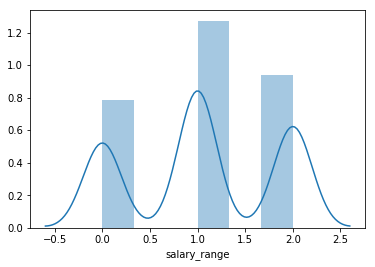

In [251]:
import seaborn as sns


sns.distplot(jobs_dummy['salary_range'])

In [11]:
# Section 1 - Define salary_range as the target variable y

y = jobs_dummy['salary_range']

In [12]:
# Define X as all variables except for salary and salary_range

X = jobs_dummy
X.drop(['salary', 'salary_range'], axis=1, inplace=True)
X.columns

Index(['job_desc', 'advertiser_A.G. Coombs', 'advertiser_AGL',
       'advertiser_AIA Insurance', 'advertiser_AIG', 'advertiser_AKQA',
       'advertiser_APT Travel Group', 'advertiser_AYAN INFOTECH PTY LTD',
       'advertiser_Accenture', 'advertiser_ActivePipe',
       ...
       'title_Wherescape Red Consultant',
       'title_Workforce Management (Kronos) Solution Consultant',
       'title_ahm Campaign Specialist', 'title_eCommerce Account Manager',
       'title_eCommerce Coordinator', 'title_eCommerce Digital Manager',
       'title_webMethods Technical Lead', 'type_Contract/Temp',
       'type_Full Time', 'type_Part Time'],
      dtype='object', length=1499)

In [15]:
# Split jobs_dummy to train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(709, 1499) (709,)
(350, 1499) (350,)


In [ ]:
# Use TfidfVectorizer to extract features from jobs_desc column and fit to train (this is to be used only if vectorized jobs_desc is required for model)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialise TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', token_pattern= '\w+')

# Fit and transform the training data

tfidf_train = tfidf_vectorizer.fit_transform(X_train['job_desc'])
print("train data " + str(tfidf_train.shape))

# Fit and transform the test data

tfidf_test = tfidf_vectorizer.transform(X_test['job_desc'])
print("test data " + str(tfidf_test.shape))

In [ ]:
# Get the feature names of TfidfVectorizer (this is to be used only if vectorized jobs_desc is required for model))

tfidf_features = tfidf_vectorizer.get_feature_names()
print(tfidf_features)

In [16]:
# Remove job_desc
X_train = X_train.drop('job_desc', axis=1)
X_test = X_test.drop('job_desc', axis=1)


In [ ]:
# Convert tfidf_train and tfidf_test to DataFrames (this is to be used only if vectorized jobs_desc is required for model)

df_tfidf_train = pd.DataFrame(tfidf_train.toarray(), columns = tfidf_features)
df_tfidf_test = pd.DataFrame(tfidf_test.toarray(), columns = tfidf_features)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Join tfidf_train and tfidf_test to DataFrames to the original one with the other columns (this is to be used only if vectorized jobs_desc is required for model) 

X_train = X_train.join(df_tfidf_train)
X_test = X_test.join(df_tfidf_test)

In [ ]:
# Replace with NaN values with zero (this is to be used only if vectorized jobs_desc is required for model))

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [17]:
# Predict using Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf_dt = DecisionTreeClassifier() # Initiate Decision Tree as the classifier model

clf_dt.fit(X_train, y_train) # Fit model to the train set

y_pred = clf_dt.predict(X_test) # Predict test set

accuracy_score(y_test, y_pred) # Evaluate test-set accuracy

0.5

In [18]:
# Predict using Support Vector Machine (SVM)

from sklearn import svm

clf_svm = svm.SVC() # Initiate  Support Vector Machine the classifier model

clf_svm.fit(X_train, y_train) # Fit model to the train set

y_pred = clf_svm.predict(X_test) # Predict test set

accuracy_score(y_test, y_pred) # Evaluate test-set accuracySupport Vector Machine (SVM)

0.42857142857142855

In [19]:
# Predict using MultinomialNB Classifier

from sklearn.naive_bayes import MultinomialNB

clf_Mult = MultinomialNB() # Initiate Decision Tree as the classifier model

clf_Mult.fit(X_train, y_train) # Fit model to the train set

y_pred = clf_Mult.predict(X_test) # Predict test set

accuracy_score(y_test, y_pred) # Evaluate test-set accuracy

0.5571428571428572

In [20]:
# Predict using KNN Classifier

from sklearn import neighbors

clf_KNN = neighbors.KNeighborsClassifier(n_neighbors = 1) # Initiate KNeighboursClassifier as the classifier model

clf_KNN.fit(X_train, y_train) # Fit model to the train set

y_pred = clf_KNN.predict(X_test) # Predict test set

accuracy_score(y_test, y_pred) # Evaluate test-set accuracy

0.5714285714285714

In [21]:
from sklearn.grid_search import GridSearchCV

params = {"n_neighbors": np.arange(1,3),
          "metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator=clf_KNN, param_grid = params)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)


C:\Users\Georgie\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Georgie\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.5162200282087447
1


In [26]:
# Predict using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf_RandomForest = RandomForestClassifier() # Initiate RandomForest as the classifier model

clf_RandomForest.fit(X_train, y_train) # Fit model to the train set

y_pred = clf_RandomForest.predict(X_test) # Predict test set

accuracy_score(y_test, y_pred) # Evaluate test-set accuracy

0.5428571428571428

In [24]:
# Baseline accuracy - the proportion of majority class

baseline = y.value_counts() / y.sum()

print(y.value_counts())
print(baseline)

1    449
2    332
0    278
Name: salary_range, dtype: int64
1    0.403414
2    0.298293
0    0.249775
Name: salary_range, dtype: float64


### Summary  of the evaluation of the above classification models: <br>

1. When all features were selected to include the vectorized job_desc, the best model that performed was the Decision Tree classifier with accuracy score of 0.44, which is just above the count of the majority class or the baseline. Support Vector Machine (SVM), MultinomialNB, RandomForestClassifier also performed above the baseline <br>
<br>
2. However, when models were run without the vectorized job_desc, all models performed better and above the baseline. The best model that performed was  KNN Classifier with an accuracy score of 0.57


# Section 2 - Predicting seniority based job description

This model will predict whether a job is for a senior or non-senior position based on the text of the full description of the of the ad. The vectorized features will be used to also predict the seniority of the position. It is assumed that the job description will provide the required skills and experience information

In order to predict whether a job ad is for a senior or non-senior position, a new column senior_flag will be created to be the predicted value and will be populated based on the job titles. A rule will be created where job titles with words 'Head', 'Senior', 'Director', 'Lead', 'Chief', 'Manager' will be defined as senior roles.

__0 - represents non-senior position__<br>
__1 - represents senior position__<br>

In [239]:
# Create new DataFrame from jobs_df_csv to only include job_desc, salary and title

new_df_csv = '../project-four/jobs_df.csv'
new_df = pd.read_csv(new_df_csv, encoding='iso-8859-1', index_col ='job_ids')

new_df = pd.DataFrame(new_df, columns = ['job_desc','title'])
new_df.shape

(1059, 2)

In [240]:
# Clean jobs_desc column 

new_df.job_desc = new_df.job_desc.str.replace('[0-9]','') # removes digits
new_df.job_desc = new_df.job_desc.str.replace('/_/','') # removes words that starts with underscore _
new_df.job_desc = new_df.job_desc.str.replace('(xa)','') # removes words that starts with underscore 

In [241]:
#Create new column 'senior_flag' and append it with values y 

new_df.insert(1 , 'senior_flag', 'n')

In [242]:
new_df.columns

Index(['job_desc', 'senior_flag', 'title'], dtype='object')

In [243]:
# Update senior_flag based on the rules stated above

new_df.loc[new_df['title'].str.contains('Head'), 'senior_flag'] = 'y'
new_df.loc[new_df['title'].str.contains('Senior'), 'senior_flag'] = 'y'
new_df.loc[new_df['title'].str.contains('Director'), 'senior_flag'] = 'y'
new_df.loc[new_df['title'].str.contains('Lead'), 'senior_flag'] = 'y'
new_df.loc[new_df['title'].str.contains('Chief'), 'senior_flag'] = 'y'
new_df.loc[new_df['title'].str.contains('Manager'), 'senior_flag'] = 'y'

In [244]:
# Check counts of senior_flag
new_df.senior_flag.value_counts()

n    643
y    416
Name: senior_flag, dtype: int64

In [122]:
# Drop title
new_df.drop('title', axis=1, inplace=True)
new_df.head()

,job_desc,senior_flag
job_ids,,
36097862,"['<div class=""templatetext"">\n ...",n
36447540,"['<div class=""jobtitle"">\n ...",n
36480731,"['<div class=""templatetext"">\n ...",n
36541524,"['<div class=""templatetext"">\n ...",n
36583998,"['<div class=""templatetext"">\n ...",n


In [123]:
new_df.head(1)

,job_desc,senior_flag
job_ids,,
36097862,"['<div class=""templatetext"">\n ...",n


In [124]:
# Define senior_flag as the target variable y

y = new_df.senior_flag

In [125]:
# Drop senior_flag
new_df.drop('senior_flag', axis=1, inplace=True)
new_df.head()

,job_desc
job_ids,
36097862,"['<div class=""templatetext"">\n ..."
36447540,"['<div class=""jobtitle"">\n ..."
36480731,"['<div class=""templatetext"">\n ..."
36541524,"['<div class=""templatetext"">\n ..."
36583998,"['<div class=""templatetext"">\n ..."


In [126]:
# Define X as job_desc

X = new_df.job_desc

In [127]:
# Split jobs_dummy to train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(709,) (709,)
(350,) (350,)


In [128]:
# Use TfidfVectorizer to extract features from jobs_desc column and fit to train

from sklearn.feature_extraction.text import TfidfVectorizer


# Initialise TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
print("train data " + str(tfidf_train.shape))

# Fit and transform the test data

tfidf_test = tfidf_vectorizer.transform(X_test)
print("test data " + str(tfidf_test.shape))

train data (709, 8772)
test data (350, 8772)


In [129]:
tfidf_train

<709x8772 sparse matrix of type '<class 'numpy.float64'>'
	with 107654 stored elements in Compressed Sparse Row format>

In [130]:
tfidf_test

<350x8772 sparse matrix of type '<class 'numpy.float64'>'
	with 51764 stored elements in Compressed Sparse Row format>

In [131]:
# Get the feature names of TfidfVectorizer

tfidf_features = tfidf_vectorizer.get_feature_names()

### Below is a function derived from datacamp to generate the confusion matrix

In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from itertools import *

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.706
Confusion matrix, without normalization


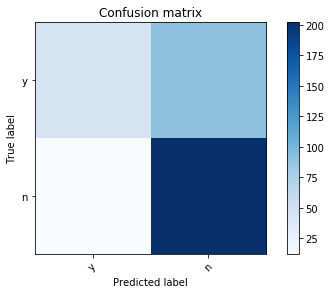

In [184]:
# Predict using Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression() # Initiate LogisticRegressionas the classifier model

clf_lr.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_lr.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred, labels=['y', 'n'])
plot_confusion_matrix(cm, classes=['y', 'n'])

accuracy:   0.706
Confusion matrix, without normalization


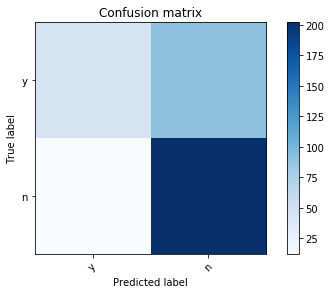

In [185]:
# Predict using SGDRegressor
from sklearn.linear_model import SGDRegressor

clf_SGD = LogisticRegression() # Initiate SGDRegressor as the classifier model

clf_SGD.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_SGD.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred, labels=['y', 'n'])
plot_confusion_matrix(cm, classes=['y', 'n'])

accuracy:   0.700
Confusion matrix, without normalization


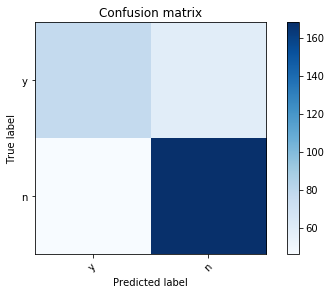

In [186]:
# Predict using Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf_dt = DecisionTreeClassifier() # Initiate Decision Tree as the classifier model

clf_dt.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_dt.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred, labels=['y', 'n'])
plot_confusion_matrix(cm, classes=['y', 'n'])

accuracy:   0.700
Confusion matrix, without normalization


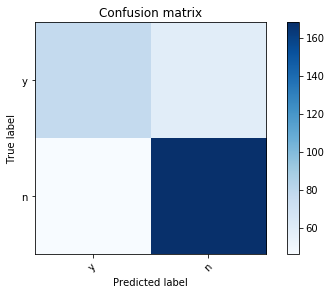

In [187]:
# Predict using Support Vector Machine (SVM)

from sklearn import svm

clf_svm = svm.SVC() # Initiate  Support Vector Machine the classifier model

clf_svm.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_svm.predict(tfidf_test) # Predict test set

y_pred = clf_dt.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred, labels=['y', 'n'])
plot_confusion_matrix(cm, classes=['y', 'n'])

accuracy:   0.623
Confusion matrix, without normalization


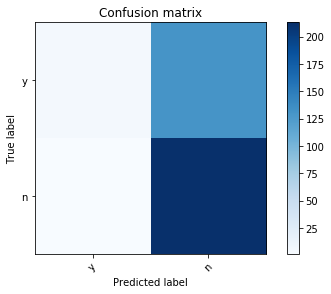

In [188]:
# Predict using MultinomialNB Classifier

from sklearn.naive_bayes import MultinomialNB

clf_Mult = MultinomialNB() # Initiate MultinomialNB  as the classifier model

clf_Mult.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_Mult.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred, labels=['y', 'n'])
plot_confusion_matrix(cm, classes=['y', 'n'])

accuracy:   0.671
Confusion matrix, without normalization


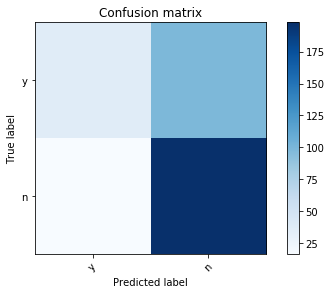

In [189]:
# Predict using KNN Classifier

from sklearn import neighbors

clf_KNN = neighbors.KNeighborsClassifier(n_neighbors = 1) # Initiate KNeighboursClassifier as the classifier model

clf_KNN.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_KNN.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred, labels=['y', 'n'])
plot_confusion_matrix(cm, classes=['y', 'n'])


accuracy:   0.680
Confusion matrix, without normalization


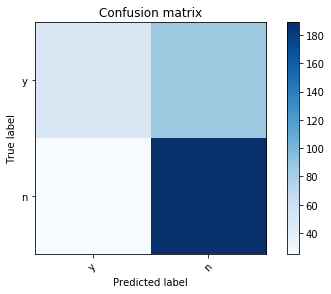

In [190]:
# Predict using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf_RandomForest = RandomForestClassifier() # Initiate RandomForest as the classifier model

clf_RandomForest.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_RandomForest.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred, labels=['y', 'n'])
plot_confusion_matrix(cm, classes=['y', 'n'])

### Baseline accuracy - the proportion of majority class

In [88]:
# Baseline accuracy - the proportion of majority class

baseline = y.value_counts() / y.count()

print(y.value_counts())
print(baseline)

n    643
y    416
Name: senior_flag, dtype: int64
n    0.607177
y    0.392823
Name: senior_flag, dtype: float64


### Inspect the top 30 vectors

In [197]:
sorted(zip(clf_lr.coef_[0], tfidf_features), reverse=True)[:20]

[(1.7685683087987345, 'senior'),
 (1.7311242178090998, 'manager'),
 (1.152162283736196, 'leadership'),
 (1.0880595111557092, 'lead'),
 (0.9201770138141511, 'management'),
 (0.8849902994947862, 'marketing'),
 (0.8598463419477885, 'strategic'),
 (0.8466669573617484, 'deloitte'),
 (0.8230127579393386, 'strategy'),
 (0.800093294674445, 'managing'),
 (0.7013467653430323, 'test'),
 (0.6952277768341554, 'brand'),
 (0.6814778879187504, 'commercial'),
 (0.6732484017010363, 'innovative'),
 (0.671406792125169, 'demonstrated'),
 (0.66662017099734, 'project'),
 (0.6578066560662956, 'design'),
 (0.6485875626928522, 'delivery'),
 (0.6433771630911275, 'manage'),
 (0.6378669156693845, 'relationships')]

## Executive Summary

#### __Purpose__<br>
The purpose of this section is to provide a brief summary of the key findings, performance and evaluation of the models that predict job salary trends and job category factors, specific to data science and data related jobs <br>
#### __Data Source__<br>
The job ads data has been sourced via webscraping from seek.com.au using search words:<br>
__'Data-Scientist-jobs','Data-Science-jobs','Data-Analyst-jobs','Data-Engineer-jobs','Data-Analytics-jobs', 'Analytics-jobs','Data-Insights-jobs','Big-Data-jobs','Business-Intelligence-jobs','Data-Warehouse-jobs','Data-Consultant-jobs'__<br>
<br>
Since most ads did not contain salary information, the approach taken here to gather the target variable salary, was to scrape and search separately different salary classification. The seek.com.au website has salary range buttons that allows end-users to filter by salary. This dataset includes three salary classes: __'below_100k', '100-150k', '150+'__<br>
#### __Section 1:  Predicting Job Salary based on all available features__
This predictive model aims to predict the salary classes or range of each job ads based on the features gathered. These features include 'job_desc', 'salary', 'advertiser', 'title', 'class', 'sub_class','type'<br>
<br>
All features where all categorical features and all had to be dummified. Initially, the model used and vectorized the job_desc but performed just below the baseline. Instead, the remaining features were used without the vectorized job_desc. As a result, all models performed better and above the __baseline score of 0.40.__ The best model that performed was KNN Classifier with an __accuracy score of 0.57__
#### __Section 2: Predicting seniority based job description__
This predictive model aims to predict whether a job is for a senior or non-senior position based on the text of the full description of the of the ad.<br>
<br>
In order to predict whether a job ad is for a senior or non-senior position, a new column senior_flag has been created to be the predicted value and were populated based on the job titles.<br>
<br>
Tfidf_vectorizer were used to vectorize the job_desc with some pre-preprocessing. Overall, all the classifier models that were used performed above __baseline score of 0.60__. The best models that performed were the LogisticRegression, SGDRegressor, DecisionTreeClassifier and Support Vector Machine. All had the same __score of 0.70__<br>

__The top 20 vectors or words in this model were:__

(1.7685683087987345, 'senior'), <br>
(1.7311242178090998, 'manager'),<br>
(1.152162283736196, 'leadership'),<br>
(1.0880595111557092, 'lead'),<br>
(0.9201770138141511, 'management'),<br>
(0.8849902994947862, 'marketing'),<br>
(0.8598463419477885, 'strategic'),<br>
(0.8466669573617484, 'deloitte'),<br>
(0.8230127579393386, 'strategy'),<br>
(0.800093294674445, 'managing'),<br>
(0.7013467653430323, 'test'),<br>
(0.6952277768341554, 'brand'),<br>
(0.6814778879187504, 'commercial'),<br>
(0.6732484017010363, 'innovative'),<br>
(0.671406792125169, 'demonstrated'),<br>
(0.66662017099734, 'project'),<br>
(0.6578066560662956, 'design'),<br>
(0.6485875626928522, 'delivery'),<br>
(0.6433771630911275, 'manage'),<br>
(0.6378669156693845, 'relationships')<br>

### Conclusion
Overall the models to predict salary and job seniority has perfomed well, scoring above the baseline scores. There are limitations with the dataset in order to predict pure 'Data Science' or 'Data Science' jobs as there are simply not enough instances of these jobs. The scope of this exercise was also to include all data-related jobs which made predicitive modelling possible. The models could also benefit from widening the dataset. This dataset was only filtered on Melbourne region. The model can possibly be improved by doing more cleaning and pre-processing of the text data